# EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/SolarFlare_Dataset.csv')

Mounted at /content/drive


In [4]:
# Convert the 'T_REC' column to datetime type
data['T_REC'] = pd.to_datetime(data['T_REC'], errors='coerce')

In [5]:
# Filter out records with high noise
filtered_data = data[data['QUALITY'] <= 65536]

# Check for missing values
print(filtered_data.isnull().sum())

FlareNumber     0
T_REC           0
NOAA_AR         0
QUALITY         0
Longitude       0
Latitude        0
TOTUSJH         0
TOTBSQ          0
TOTPOT          0
TOTUSJZ         0
ABSNJZH         0
SAVNCPP         0
USFLUX          0
AREA_ACR        0
TOTFZ           0
MEANPOT         0
R_VALUE         0
EPSZ            0
SHRGT45         0
MEANSHR        15
MEANGAM         0
MEANGBT         0
MEANGBZ         0
MEANGBH         0
MEANJZH         0
TOTFY           0
MEANJZD         0
MEANALP         0
TOTFX           0
EPSY            0
EPSX            0
dtype: int64


In [6]:
# Separate numerical and non-numerical columns
numerical_columns = filtered_data.select_dtypes(include=[np.number]).columns
non_numerical_columns = filtered_data.select_dtypes(exclude=[np.number]).columns

# Impute missing values in numerical columns with the mean
filtered_data[numerical_columns] = filtered_data[numerical_columns].fillna(filtered_data[numerical_columns].mean())

# Verify that there are no more missing values in numerical columns
print(filtered_data[numerical_columns].isnull().sum())

FlareNumber    0
NOAA_AR        0
QUALITY        0
Longitude      0
Latitude       0
TOTUSJH        0
TOTBSQ         0
TOTPOT         0
TOTUSJZ        0
ABSNJZH        0
SAVNCPP        0
USFLUX         0
AREA_ACR       0
TOTFZ          0
MEANPOT        0
R_VALUE        0
EPSZ           0
SHRGT45        0
MEANSHR        0
MEANGAM        0
MEANGBT        0
MEANGBZ        0
MEANGBH        0
MEANJZH        0
TOTFY          0
MEANJZD        0
MEANALP        0
TOTFX          0
EPSY           0
EPSX           0
dtype: int64


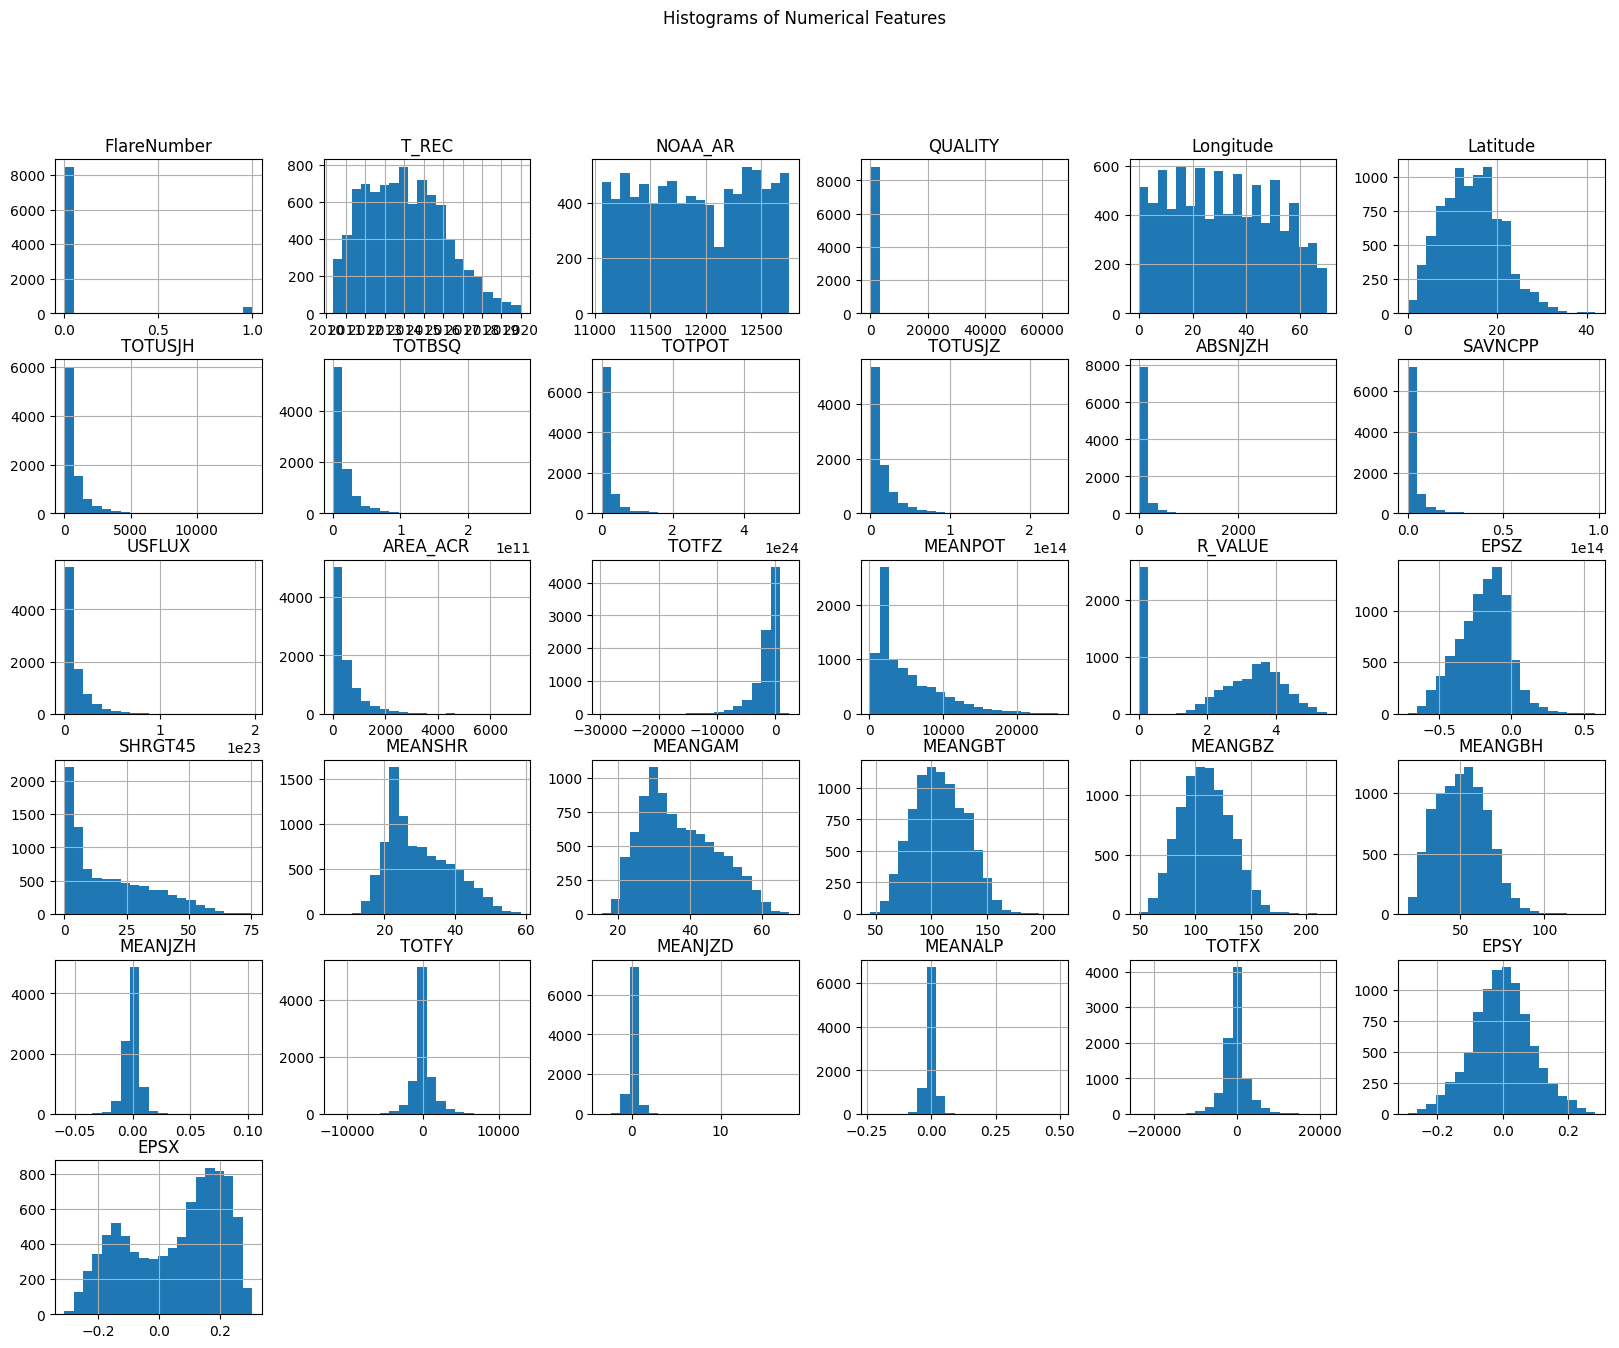

In [8]:
import matplotlib.pyplot as plt

#Histogram for numerical features
filtered_data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

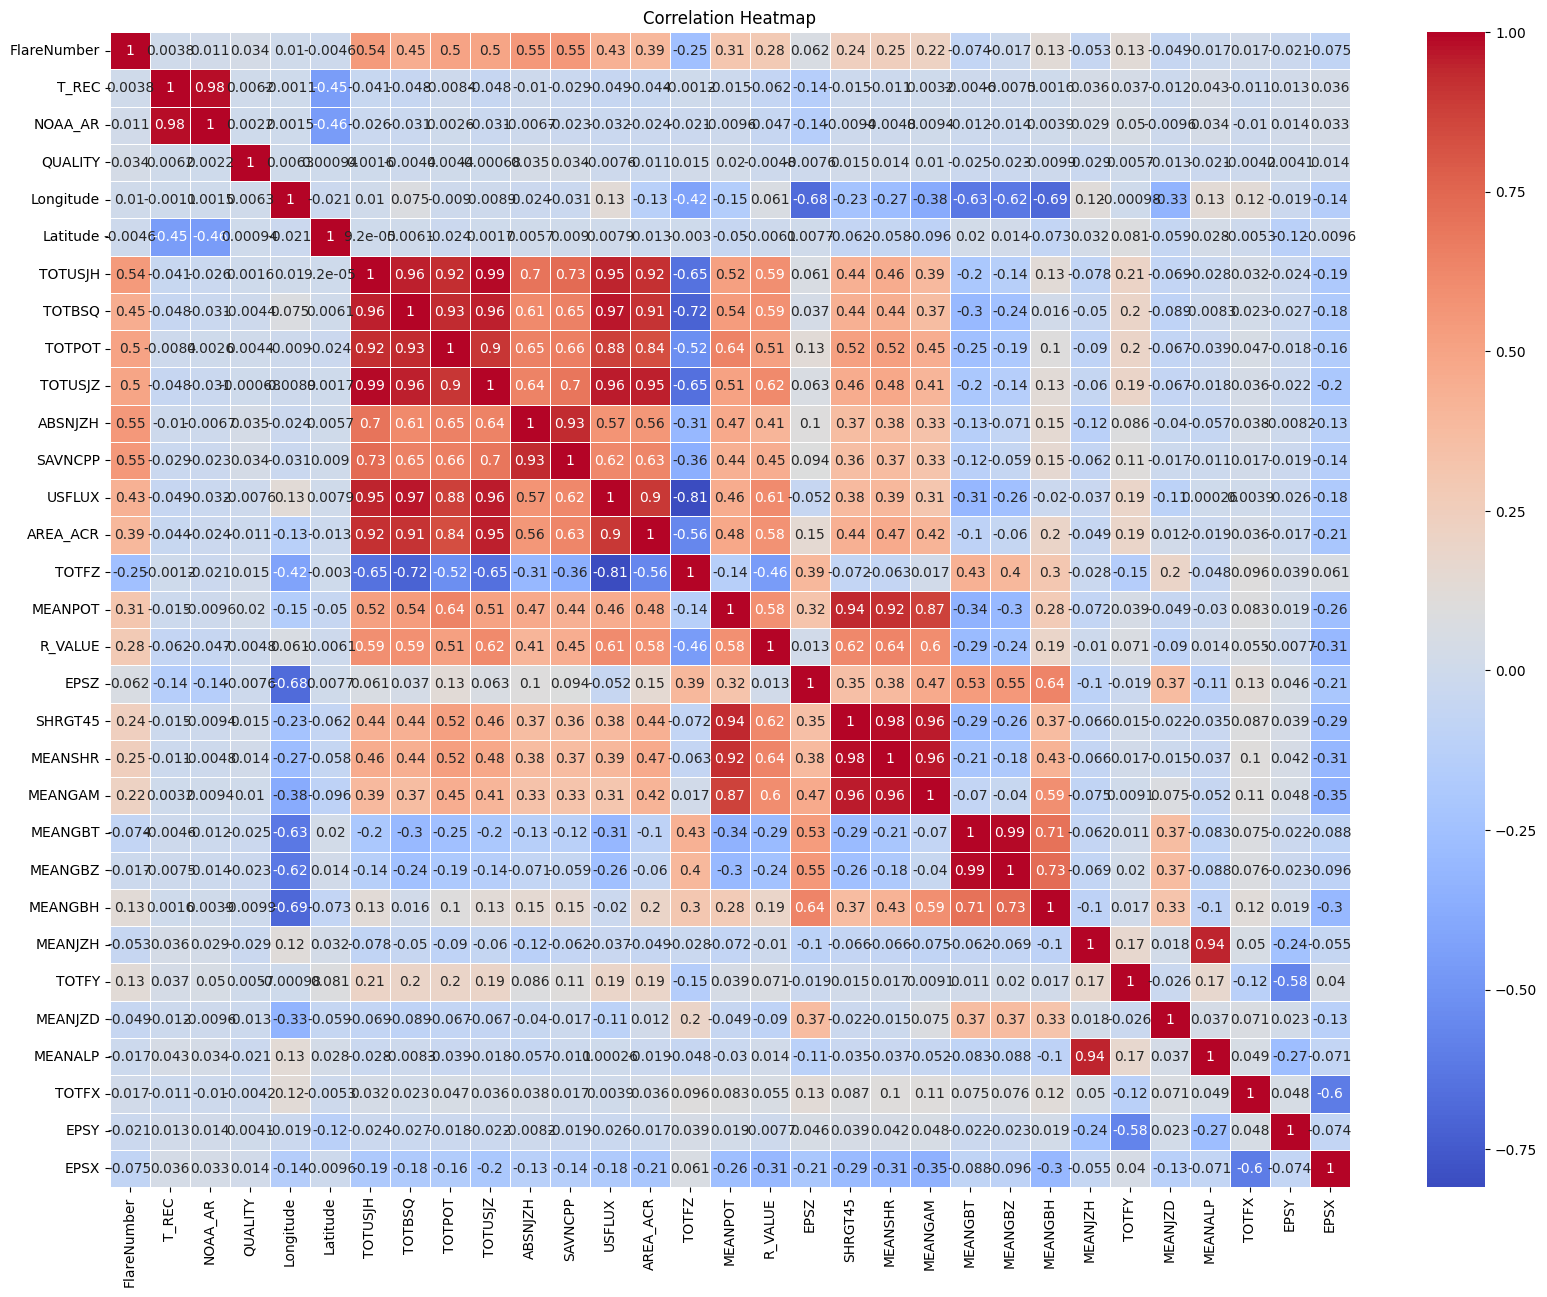

In [9]:
# Correlation heatmap
import seaborn as sns

plt.figure(figsize=(20, 15))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

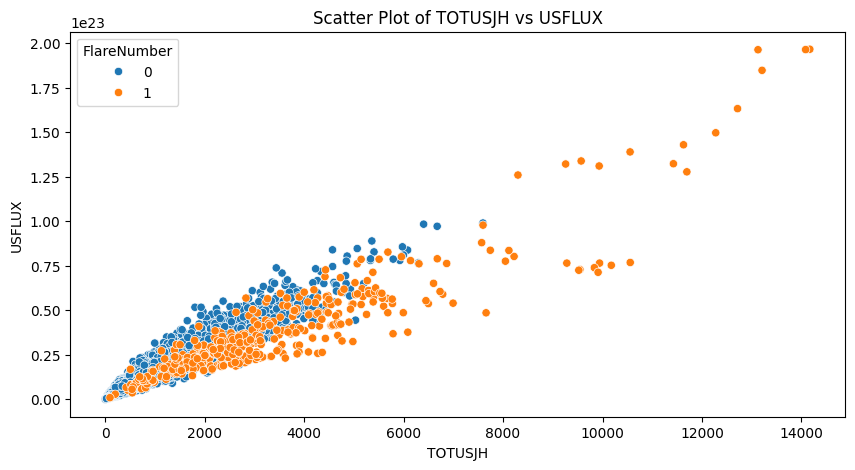

In [10]:
# Scatter plot for a few feature pairs
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTUSJH', y='USFLUX', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTUSJH vs USFLUX')
plt.show()

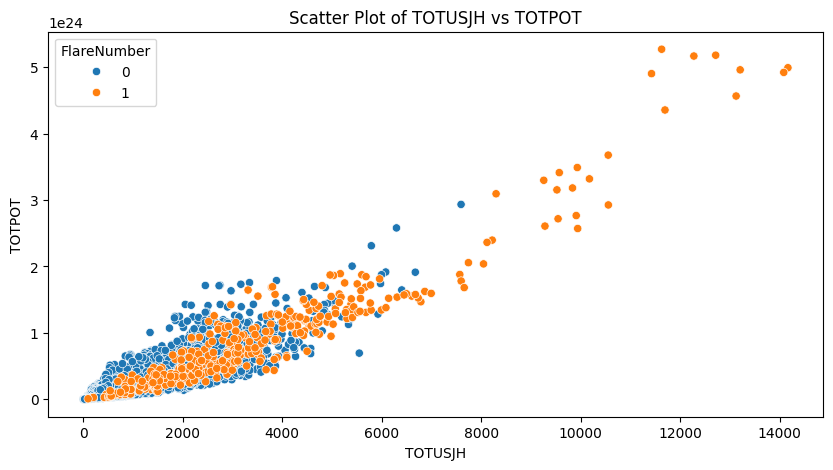

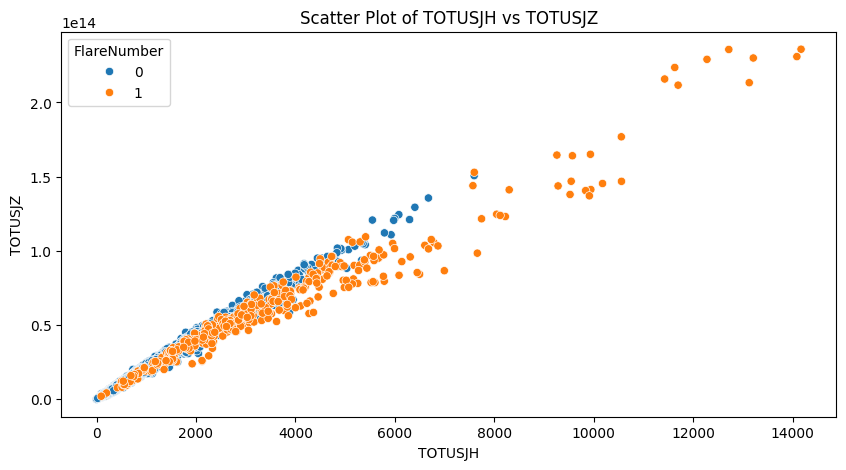

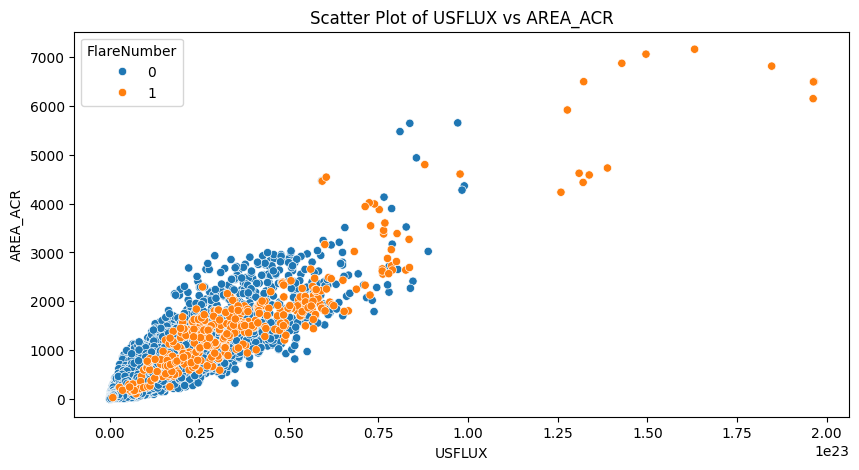

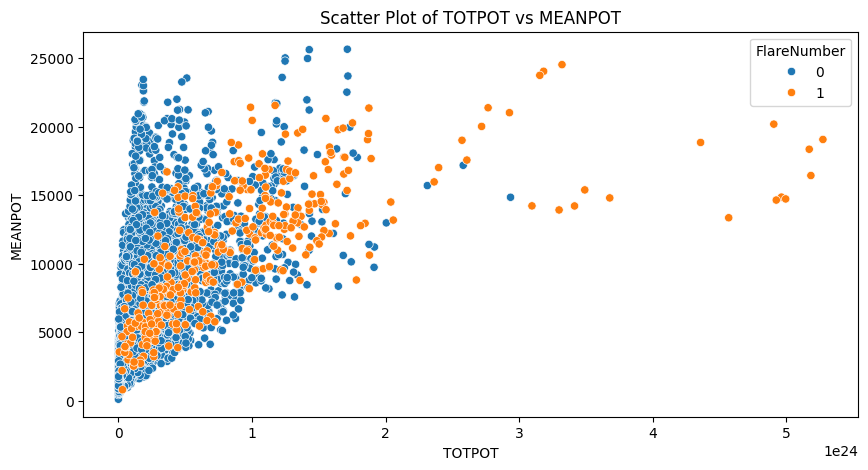

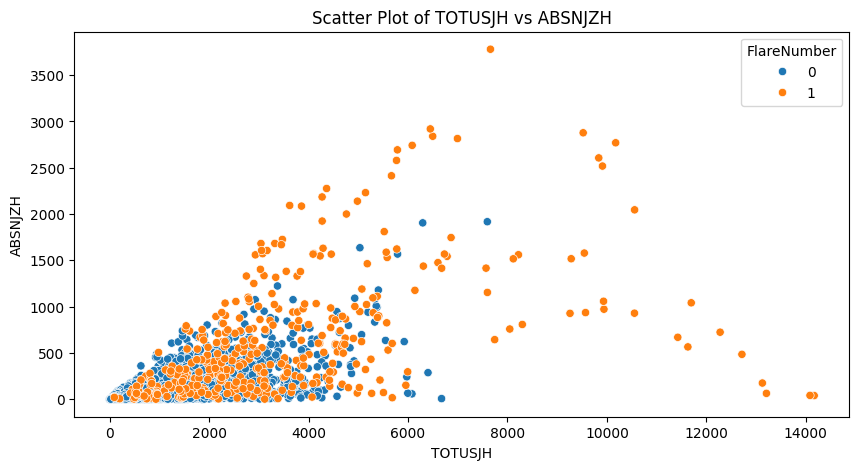

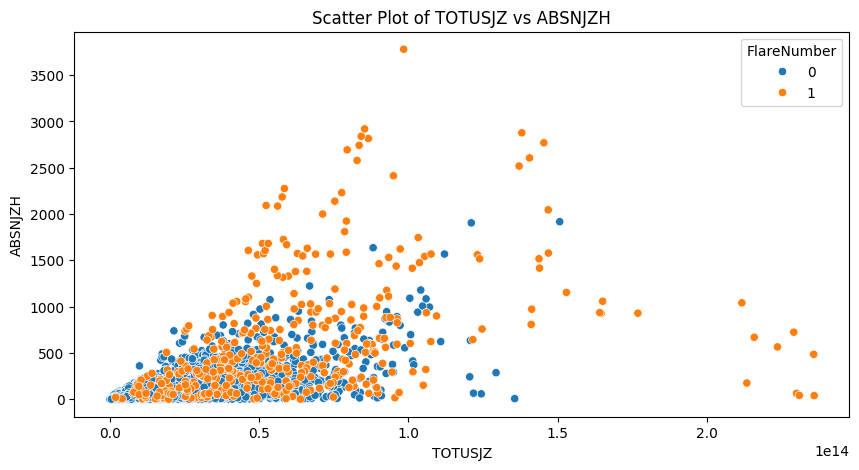

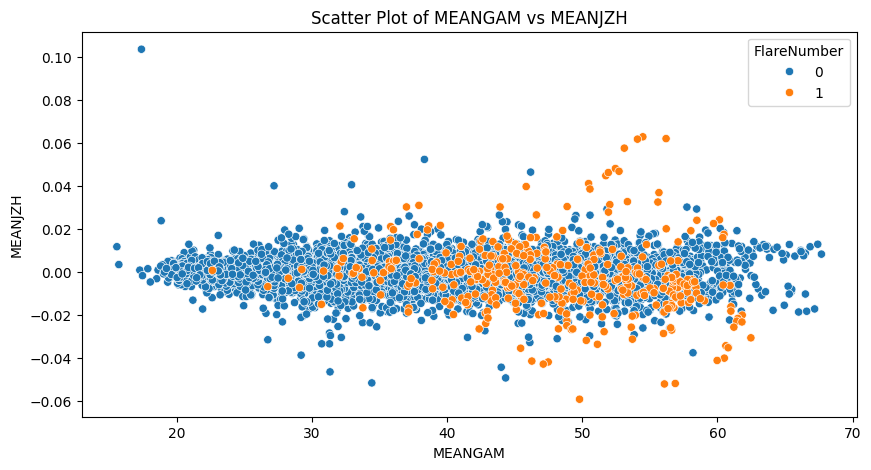

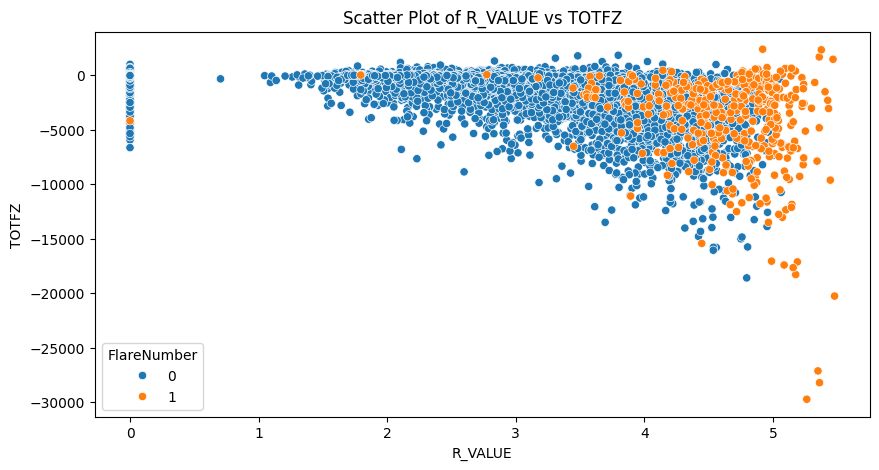

In [11]:
# TOTUSJH vs. TOTPOT
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTUSJH', y='TOTPOT', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTUSJH vs TOTPOT')
plt.show()

# TOTUSJH vs. TOTUSJZ
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTUSJH', y='TOTUSJZ', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTUSJH vs TOTUSJZ')
plt.show()

# USFLUX vs. AREA_ACR
plt.figure(figsize=(10, 5))
sns.scatterplot(x='USFLUX', y='AREA_ACR', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of USFLUX vs AREA_ACR')
plt.show()

# TOTPOT vs. MEANPOT
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTPOT', y='MEANPOT', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTPOT vs MEANPOT')
plt.show()

# TOTUSJH vs. ABSNJZH
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTUSJH', y='ABSNJZH', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTUSJH vs ABSNJZH')
plt.show()

# TOTUSJZ vs. ABSNJZH
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TOTUSJZ', y='ABSNJZH', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of TOTUSJZ vs ABSNJZH')
plt.show()

# MEANGAM vs. MEANJZH
plt.figure(figsize=(10, 5))
sns.scatterplot(x='MEANGAM', y='MEANJZH', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of MEANGAM vs MEANJZH')
plt.show()

# R_VALUE vs. TOTFZ
plt.figure(figsize=(10, 5))
sns.scatterplot(x='R_VALUE', y='TOTFZ', hue='FlareNumber', data=filtered_data)
plt.title('Scatter Plot of R_VALUE vs TOTFZ')
plt.show()


# Data Preprocessing

In [37]:
# Normalize the numerical features
scaler = StandardScaler()
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

In [38]:
# Extract temporal features from the datetime column
filtered_data['day_of_year'] = filtered_data['T_REC'].dt.dayofyear
filtered_data['year'] = filtered_data['T_REC'].dt.year

# Verify that temporal features are extracted correctly
print(filtered_data[['T_REC', 'day_of_year', 'year']].head())

                T_REC  day_of_year  year
0 2010-05-01 23:48:00          121  2010
1 2010-05-02 23:48:00          122  2010
2 2010-05-03 23:48:00          123  2010
3 2010-05-03 23:48:00          123  2010
4 2010-05-03 23:48:00          123  2010


In [39]:
# Prepare features and target variable
X = filtered_data.drop(columns=['FlareNumber', 'T_REC'])
y = filtered_data['FlareNumber']

In [40]:
# Convert target variable to binary and integer type
y = (y > 0).astype(int)

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Reshape the data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

In [43]:
# Print shapes and data types
print(f"X_train_reshaped shape: {X_train_reshaped.shape}, dtype: {X_train_reshaped.dtype}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}, dtype: {X_test_reshaped.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

X_train_reshaped shape: (7099, 1, 31), dtype: float64
X_test_reshaped shape: (1775, 1, 31), dtype: float64
y_train shape: (7099,), dtype: int64
y_test shape: (1775,), dtype: int64


In [44]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.5217551080405703, 1: 11.991554054054054}


# LSTM Evaluation

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_complex_model(units=150, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [63]:
# Create the model
complex_model = create_complex_model()

In [64]:
# Train the model with class weights
history = complex_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, class_weight=class_weights)

Epoch 1/100
89/89 [==============================] - 7s 27ms/step - loss: 0.7143 - accuracy: 0.4982 - val_loss: 0.8912 - val_accuracy: 0.0303
Epoch 2/100
89/89 [==============================] - 2s 23ms/step - loss: 0.6997 - accuracy: 0.4304 - val_loss: 0.7503 - val_accuracy: 0.0472
Epoch 3/100
89/89 [==============================] - 2s 26ms/step - loss: 0.6117 - accuracy: 0.6781 - val_loss: 0.4199 - val_accuracy: 0.8507
Epoch 4/100
89/89 [==============================] - 2s 19ms/step - loss: 0.4795 - accuracy: 0.8082 - val_loss: 0.3224 - val_accuracy: 0.8972
Epoch 5/100
89/89 [==============================] - 1s 14ms/step - loss: 0.4835 - accuracy: 0.7811 - val_loss: 1.3029 - val_accuracy: 0.0310
Epoch 6/100
89/89 [==============================] - 1s 14ms/step - loss: 0.6085 - accuracy: 0.6758 - val_loss: 0.4964 - val_accuracy: 0.8162
Epoch 7/100
89/89 [==============================] - 1s 14ms/step - loss: 0.4106 - accuracy: 0.8257 - val_loss: 0.2612 - val_accuracy: 0.9345
Epoch 

In [65]:
# Evaluate the model on the test data
loss, accuracy = complex_model.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy:.2f}')

56/56 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 0.9211
Test accuracy: 0.92


In [66]:
# Fine-tune the threshold
best_threshold = 0.3
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.1):
    y_pred = (y_pred_prob >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}, Best F1-Score: {best_f1}')


Best Threshold: 0.8, Best F1-Score: 0.7432432432432433


In [67]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict probabilities
y_pred_prob = complex_model.predict(X_test_reshaped)

# Adjust threshold
threshold = 0.8
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the adjusted predictions
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

print(f"Accuracy: {accuracy:.2f}")


56/56 [==============================] - 1s 4ms/step
Confusion Matrix:
[[1624   66]
 [  26   59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1690
           1       0.47      0.69      0.56        85

    accuracy                           0.95      1775
   macro avg       0.73      0.83      0.77      1775
weighted avg       0.96      0.95      0.95      1775

Accuracy: 0.95


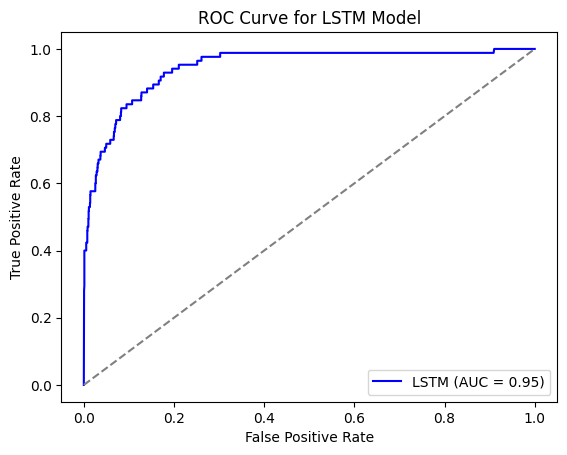

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC AUC
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_prob)
roc_auc_lstm = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc='best')
plt.show()

# RandomForest Model Evaluation

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [53]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Test accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1690
           1       0.93      0.48      0.64        85

    accuracy                           0.97      1775
   macro avg       0.95      0.74      0.81      1775
weighted avg       0.97      0.97      0.97      1775

[[1687    3]
 [  44   41]]


**After Parameter Tuning**

In [74]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [75]:
# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                                      param_distributions=rf_param_grid,
                                      n_iter=100,  # Number of parameter settings that are sampled
                                      cv=3,  # Cross-validation splitting strategy
                                      verbose=2,  # Verbosity level
                                      random_state=42,
                                      n_jobs=-1)  # Number of jobs to run in parallel

In [76]:
# Fit the model
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [79]:
# Print the best parameters and best score
print(f'Best Parameters: {rf_random_search.best_params_}')
print(f'Best Score: {rf_random_search.best_score_}')

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
Best Score: 0.9749263226888263


In [80]:
# Use the best estimator to predict on the test set
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Test accuracy (Random Forest): {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Test accuracy (Random Forest): 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.87      0.55      0.68        85

    accuracy                           0.97      1775
   macro avg       0.92      0.77      0.83      1775
weighted avg       0.97      0.97      0.97      1775

[[1683    7]
 [  38   47]]


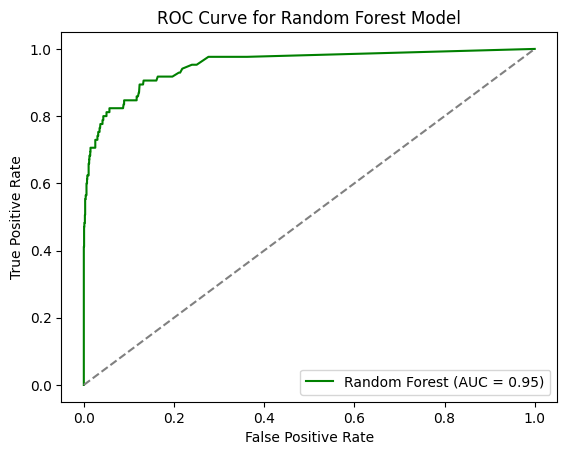

In [85]:
# Predict probabilities for the test set
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='best')
plt.show()

In [92]:
from sklearn.model_selection import cross_val_score

# Best parameters from RandomizedSearchCV
best_rf_params = rf_random_search.best_params_

# Initialize the Random Forest model with the best parameters
best_rf_model_cv = RandomForestClassifier(**best_rf_params, random_state=42, class_weight='balanced')

# Perform cross-validation
rf_cv_scores = cross_val_score(best_rf_model_cv, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Mean Accuracy: {rf_cv_scores.mean():.2f}')

Random Forest Cross-Validation Scores: [0.97183099 0.96971831 0.97535211 0.97957746 0.9739253 ]
Mean Accuracy: 0.97


# XGBoost Model Evaluation

In [56]:
import xgboost as xgb

# Flatten the data for XGBoost
X_train_flat = X_train.values
X_test_flat = X_test.values

In [57]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_flat, label=y_train)
dtest = xgb.DMatrix(X_test_flat, label=y_test)

In [58]:
# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'scale_pos_weight': (len(y_train) - sum(y_train)) / sum(y_train)  # Adjust for class imbalance
}

In [59]:
# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

In [60]:
# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Test accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1690
           1       0.72      0.69      0.71        85

    accuracy                           0.97      1775
   macro avg       0.85      0.84      0.85      1775
weighted avg       0.97      0.97      0.97      1775

[[1667   23]
 [  26   59]]


**After Parameter Tuning**

In [69]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 5, 10]
}

In [70]:
# Setup RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

xgb_random_search = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=xgb_param_grid,
                                       n_iter=100,  # Number of parameter settings that are sampled
                                       cv=3,  # Cross-validation splitting strategy
                                       verbose=2,  # Verbosity level
                                       random_state=42,
                                       n_jobs=-1)  # Number of jobs to run in parallel

In [71]:
# Fit the model
xgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 6, 9, 12],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [72]:
# Print the best parameters and best score
print(f'Best Parameters: {xgb_random_search.best_params_}')
print(f'Best Score: {xgb_random_search.best_score_}')

Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score: 0.9816878981839495


In [73]:
# Use the best estimator to predict on the test set
best_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Test accuracy (XGBoost): {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


Test accuracy (XGBoost): 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.92      0.67      0.78        85

    accuracy                           0.98      1775
   macro avg       0.95      0.83      0.88      1775
weighted avg       0.98      0.98      0.98      1775

[[1685    5]
 [  28   57]]


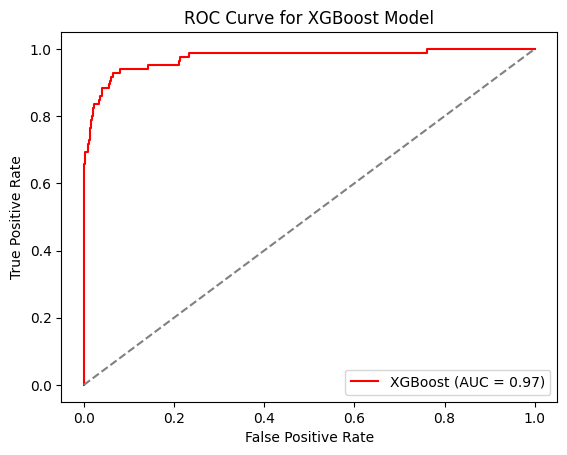

In [86]:
y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='best')
plt.show()

In [91]:
# Best parameters from RandomizedSearchCV
best_xgb_params = xgb_random_search.best_params_

# Initialize the XGBoost model with the best parameters
best_xgb_model_cv = xgb.XGBClassifier(**best_xgb_params, use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# Perform cross-validation
xgb_cv_scores = cross_val_score(best_xgb_model_cv, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'XGBoost Cross-Validation Scores: {xgb_cv_scores}')
print(f'Mean Accuracy: {xgb_cv_scores.mean():.2f}')

XGBoost Cross-Validation Scores: [0.97746479 0.98169014 0.98028169 0.98450704 0.98097252]
Mean Accuracy: 0.98
